# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [83]:
# imports
import warnings
warnings.filterwarnings('ignore')
# your code here
import pandas as pd
import numpy as np

In [84]:
titanic = pd.read_csv('titanic.csv')# your code here
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# print some info about the dataframe
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Looks like there are some Nan values, let's see how many for each column

In [86]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin** contains a lot of Nan values, we'll drop this column <br>
We'll replace the Nan values in **Age** with the age's median, and the ones in **Embarked** with **'S'**, which is the most frequent one in this column

In [87]:
# your code here to drop Cabin
titanic.drop("Cabin", axis=1, inplace=True)
# check the fillna documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
titanic["Age"].fillna(titanic["Age"].median(), inplace=True) # your code here)
titanic["Embarked"].fillna("S", inplace=True) # your code here)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Visualization

survival rate = 0.3838383838383838


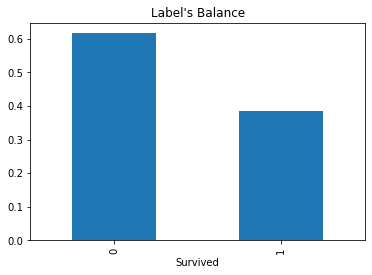

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('survival rate =', titanic.Survived.mean())
(titanic.groupby('Survived').size()/titanic.shape[0]).plot(kind="bar",title="Label's Balance")


In [89]:
# make a function to plot survival against passenger attribute

def survival_rate(column,t):
    # TODO : revoir fonction 
    df=pd.DataFrame()
    df['total']=titanic.groupby(column).size()
    df['survived'] = titanic.groupby(column).sum()['Survived']
    df['percentage'] = round(df['survived']/df['total']*100,2)
    print(df)

    df['survived'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Survivors per "+str(column))
    plt.show()

        total  survived  percentage
Sex                                
female    314       233       74.20
male      577       109       18.89


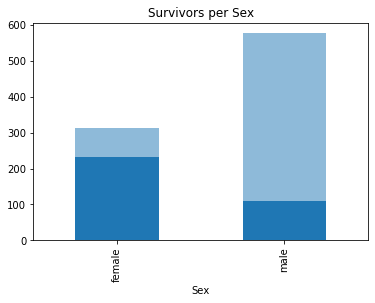

In [90]:
# Draw survival per Sex
survival_rate("Sex","bar")

        total  survived  percentage
Pclass                             
1         216       136       62.96
2         184        87       47.28
3         491       119       24.24


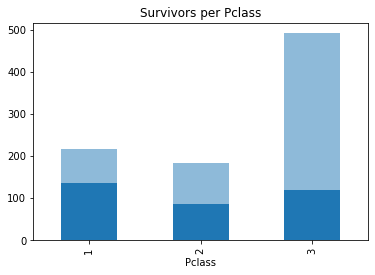

In [91]:
# Draw survival per Class
survival_rate("Pclass","bar")

          total  survived  percentage
Embarked                             
C           168        93       55.36
Q            77        30       38.96
S           646       219       33.90


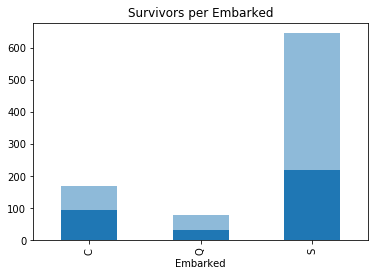

In [92]:
# Graph survived per port of embarkation
survival_rate("Embarked","bar")

       total  survived  percentage
Parch                             
0        678       233       34.37
1        118        65       55.08
2         80        40       50.00
3          5         3       60.00
4          4         0        0.00
5          5         1       20.00
6          1         0        0.00


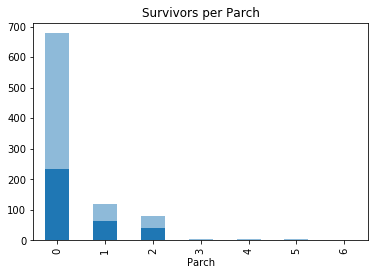

In [93]:
# Draw survived per Number of Parents/Children Aboard (Parch)
# your code here
survival_rate("Parch", "bar")

       total  survived  percentage
SibSp                             
0        608       210       34.54
1        209       112       53.59
2         28        13       46.43
3         16         4       25.00
4         18         3       16.67
5          5         0        0.00
8          7         0        0.00


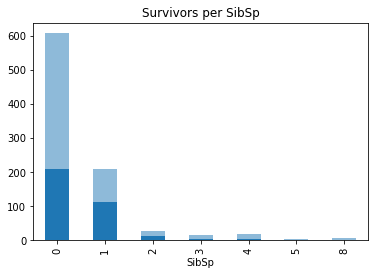

In [94]:
# Draw survived per Number of Siblings/Spouses Aboard (SibSp)
# your code here
survival_rate("SibSp", "bar")

## Model training

Some of the columns don't have predictive power, so let's specify which ones are included for prediction

In [95]:
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  

We need now to convert text columns in **predictors** to numerical ones

In [96]:
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [97]:
# Split the data into a training set and a testing set. Set: test_size=0.3, random_state=1
# your code here
x = titanic[predictors]
y = titanic["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (623, 7) (623,)
test shape (268, 7) (268,)


In [98]:
# import LogisticRegression from: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# your code here
from sklearn.linear_model import LogisticRegression
# .fit for training
clf = LogisticRegression(random_state=1).fit(X_train, y_train)
# your code here
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8105939004815409
test accuracy = 0.7686567164179104


Let's print the model's parameters

In [99]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

     Feature  Coefficient Estimate
0     Pclass             -0.835661
1        Sex             -2.512474
2        Age             -0.026081
3      SibSp             -0.303038
4      Parch              0.067869
5       Fare              0.002659
6   Embarked             -0.117348
7  Intercept              3.803960


We now need to predict class labels for the test set. We will also generate the class probabilities

In [100]:
# predict class labels for the test set
# your code here
# to see if it is one or zero
y_pred = clf.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 0]


In [101]:
# generate class probabilities : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# your code here
y_probs = clf.predict_proba(X_test)
# 2 columns, first prediction to not survice and the second one is to survive
print (y_probs)

[[0.17498658 0.82501342]
 [0.89654863 0.10345137]
 [0.18505074 0.81494926]
 [0.38437631 0.61562369]
 [0.12775857 0.87224143]
 [0.87836074 0.12163926]
 [0.79601829 0.20398171]
 [0.15990222 0.84009778]
 [0.58878627 0.41121373]
 [0.45324822 0.54675178]
 [0.88906335 0.11093665]
 [0.40004872 0.59995128]
 [0.74064084 0.25935916]
 [0.78754936 0.21245064]
 [0.38462019 0.61537981]
 [0.6079067  0.3920933 ]
 [0.91760024 0.08239976]
 [0.91184305 0.08815695]
 [0.91436184 0.08563816]
 [0.28507975 0.71492025]
 [0.90582535 0.09417465]
 [0.89643176 0.10356824]
 [0.07770015 0.92229985]
 [0.70858489 0.29141511]
 [0.34204162 0.65795838]
 [0.89391134 0.10608866]
 [0.06611173 0.93388827]
 [0.30213959 0.69786041]
 [0.77983473 0.22016527]
 [0.07156778 0.92843222]
 [0.3736765  0.6263235 ]
 [0.6054001  0.3945999 ]
 [0.45893842 0.54106158]
 [0.4679678  0.5320322 ]
 [0.91439336 0.08560664]
 [0.51526176 0.48473824]
 [0.656529   0.343471  ]
 [0.89669241 0.10330759]
 [0.58705157 0.41294843]
 [0.8755466  0.1244534 ]


As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 (Survived) any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [102]:
pred = pd.DataFrame({        
        "Survived_original": y_test,
        "Survived_predicted": y_pred,
        "Survived_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Survived_original ==pred.Survived_predicted
pred.head()

,Survived_original,Survived_predicted,Survived_proba,Comparison
862,1,1,0.825013,True
223,0,0,0.103451,True
84,1,1,0.814949,True
680,0,1,0.615624,False
535,1,1,0.872241,True


## Confusion matrix

In [103]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[132  21]
 [ 41  74]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.78      0.64      0.70       115

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [105]:
# import cross_validation from: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# your code here
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=1)
# cross_validation.
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.7877095  0.79888268 0.78089888 0.76404494 0.81920904]
0.7901490077087383


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.

In [111]:
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"] 
noha = [1, 0, 21, 1, 0, 10, 0]
df = pd.DataFrame(np.array(noha).reshape(1, -1), columns=predictors)
df.head()

clf=LogisticRegression().fit(X_train, y_train)
print(clf.predict(df))
print(clf.predict_proba(df))

victor = [3, 1, 21, 1, 0, 10, 0]
df1 = pd.DataFrame(np.array(victor).reshape(1, -1), columns=predictors)
df1.head()

clf=LogisticRegression().fit(X_train, y_train)
print(clf.predict(df1))
print(clf.predict_proba(df1))

joe = [1, 1, 21, 1, 1, 100, 2]
df2 = pd.DataFrame(np.array(joe).reshape(1, -1), columns=predictors)
df2.head()

clf=LogisticRegression().fit(X_train, y_train)
print(clf.predict(df2))
print(clf.predict_proba(df2))

[1]
[[0.10487802 0.89512198]]
[0]
[[0.88489598 0.11510402]]
[0]
[[0.5734152 0.4265848]]


# Other regression (Support Vector Machine)

In [113]:
from sklearn import svm #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


clf = svm.SVC(C=100, degree=3, kernel='linear', probability=True).fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

print(clf.predict(df))
print(clf.predict_proba(df))

print(clf.predict(df1))
print(clf.predict_proba(df1))

print(clf.predict(df2))
print(clf.predict_proba(df2))

train accuracy = 0.8009630818619583
test accuracy = 0.753731343283582
[1]
[[0.25076001 0.74923999]]
[0]
[[0.83756994 0.16243006]]
[0]
[[0.82803445 0.17196555]]
